# Bike Sharing Demand Prediction [Multiple Linear Regression]

By: Gursewak Singh

## Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

***The company wants to know:***

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

***Goal:***
- Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
- the model will be a good way for management to understand the demand dynamics of a new market.

## Step 1: Importing Necessary Libraries

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import warnings 
warnings.filterwarnings("ignore")

## Step 2: Reading and Understanding Data

In [2]:
# read the data file "days.csv"
bike_sharing_df = pd.read_csv("day.csv")

In [3]:
# get the view of first few record
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#checking the shape
bike_sharing_df.shape

(730, 16)

In [5]:
#checking the null and datatypes of dataset
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# describing the dataset for column with numerical data
bike_sharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Insights**
- There are total of 730 record with 13 columns
- Moreover, none of columns in dataset have null values.

## Step 3 Data Cleaning and Quality Check

### Dropping insignificant and redundant columns

In [7]:
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Instant column plays no role in current analysis so we can dropt it right aways

In [8]:
#drop instant column
bike_sharing_df.drop(['instant'],axis=1,inplace=True)

Since we have full date divided into month weekday and yr, we can dropt the dteday column

In [9]:
#dropt dteday column
bike_sharing_df.drop(["dteday"], axis=1, inplace=True)

casual and registered together make up the cnt column (which is the target variable), hence does not make sense to have them.

In [10]:
#dropt casual and registered column
bike_sharing_df.drop(['casual','registered'], axis=1, inplace=True)

In [11]:
#check the dataframe
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
#inspecting the dataframe
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


Since, season, mnth, weekday and weathersit is a categorical data with label on it. Performing value count them

In [13]:
#value count for season
bike_sharing_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [14]:
#value count for mnth
bike_sharing_df.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [15]:
#value count for weekday
bike_sharing_df.weekday.value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [16]:
#value count for weathersit
bike_sharing_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

**Insight**
- season, mnth, weekday and weathersit are categorical data with label on it, therefore need to be non-numerical columns

### Checking Duplicates

Checking the duplicate row, if there is any drop the record

In [17]:
#create a copy of original dataframe
bike_sharing_dup_df = bike_sharing_df.copy()

In [18]:
#drop the duplicates in copied dataframe
bike_sharing_dup_df.drop_duplicates(subset=None, inplace=True)

In [19]:
#check the shape of original df and copied dataframe
bike_sharing_df.shape

(730, 12)

In [20]:
bike_sharing_dup_df.shape

(730, 12)

**Insights**
- Since the shape of original and copied dataframe is same, we can conclude that there is no duplicates

### Handling Missing values

We have already noticed the unavailability of null values, lets cross verify that again

In [21]:
#checking if there is any null present in our dataset
bike_sharing_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

**Insights**
- There are no null values in the dataset

### Handling Outliers

Inspecting the dataset for continous variable 

In [22]:
#checking the column with unique values, which will give us the some sense about continuous variable
bike_sharing_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

Out of all columns, temp, atemp, hum, windspeed are continuous variable 
We are not including cnt, since its a target variable

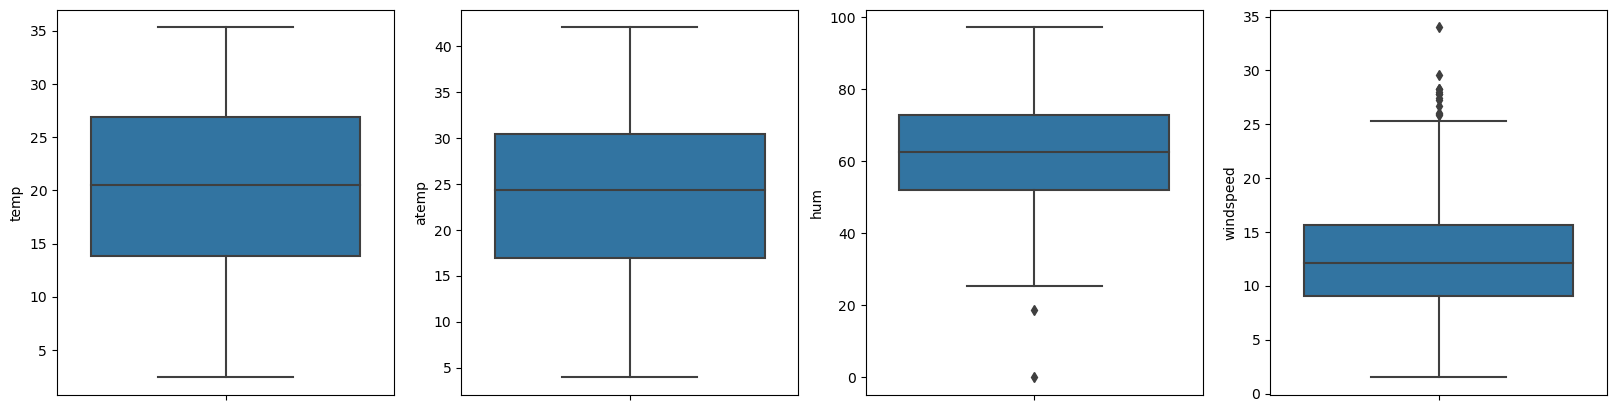

In [23]:
#drawing box plot to get the feel of outliers if any
cols = ["temp","atemp","hum","windspeed"]
plt.figure(figsize=(20,5))

for i,col in enumerate(cols):
    plt.subplot(1,4,i+1)
    sns.boxplot(y=col,data=bike_sharing_df)

**Insights**
- It is evident from box plots that there are no noticeable outliers which could hamper our data and model building.

## Step 4: Exploratory Data Analysis

### Convert season, weekday, weathersit and mnth to categorical types

In [24]:
#converting season to categorical type
bike_sharing_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace=True)

In [25]:
#converting weekday to categorical type
bike_sharing_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace=True)

In [26]:
#converting mnth to categorical type
bike_sharing_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace=True)

In [27]:
#converting weathersit to categorical type
bike_sharing_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace=True)

In [28]:
#checking the dataframe
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


### Analysing continuous variables

<Figure size 1500x2000 with 0 Axes>

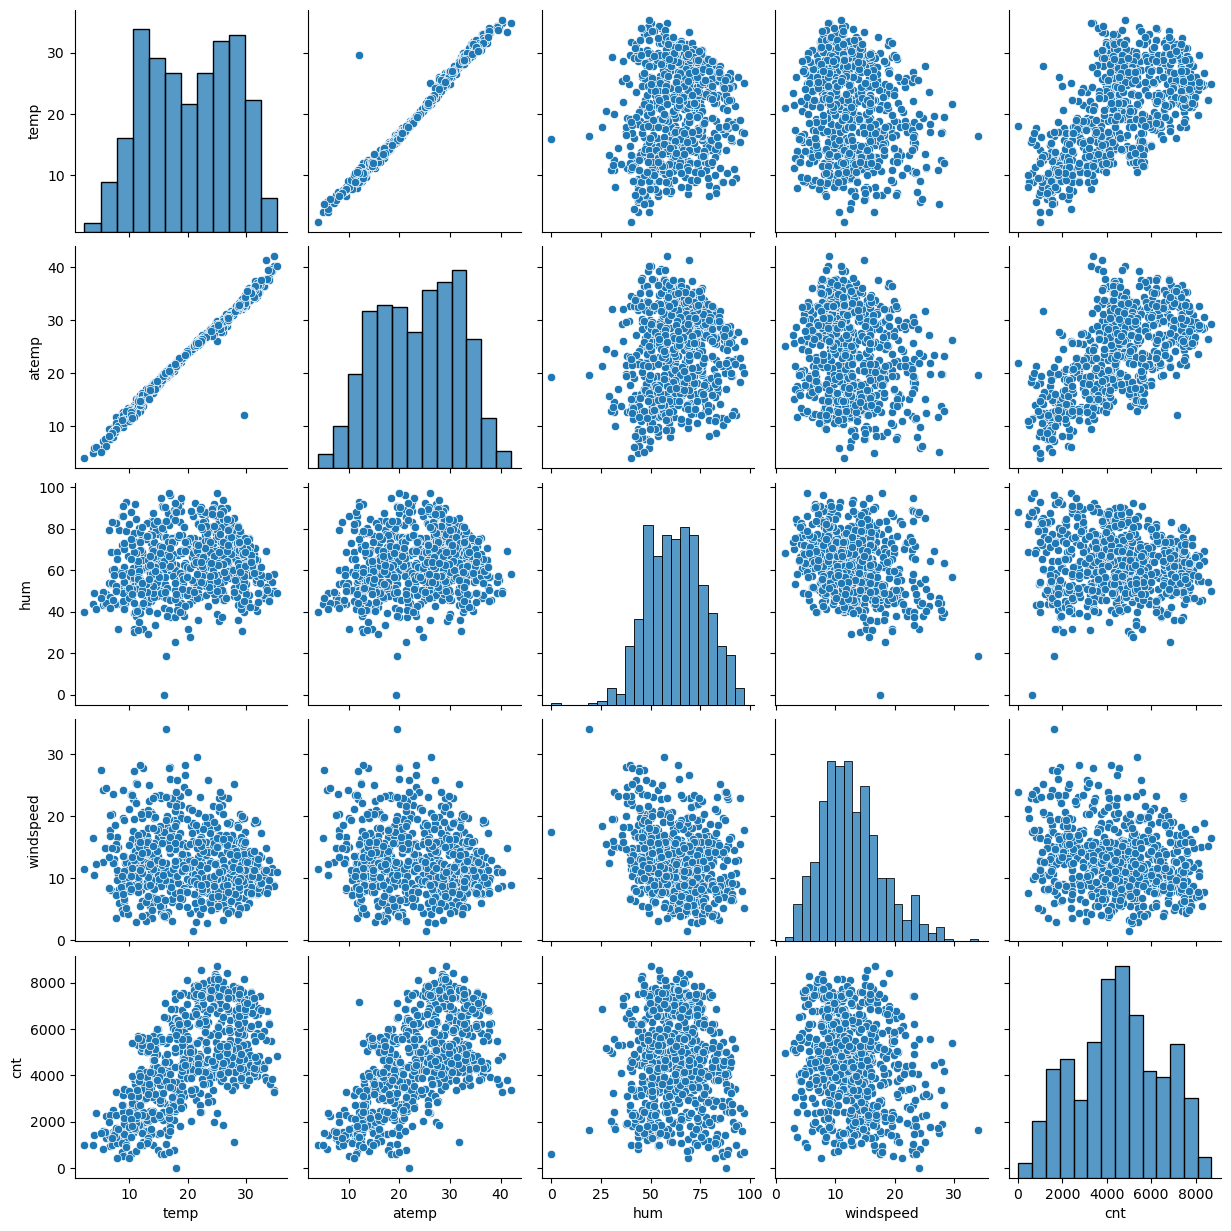

In [29]:
#for continuous variable creating pairplot
plt.figure(figsize=(15,20))
sns.pairplot(data=bike_sharing_df, vars=["temp","atemp","hum","windspeed","cnt"]);

**Insights**
- target variable (cnt) has a linear relationship with temp and atemp.
- looking closely temp and atemp is highly correlated to eachother.

Plotting heatmap to get more insight about variable correlations

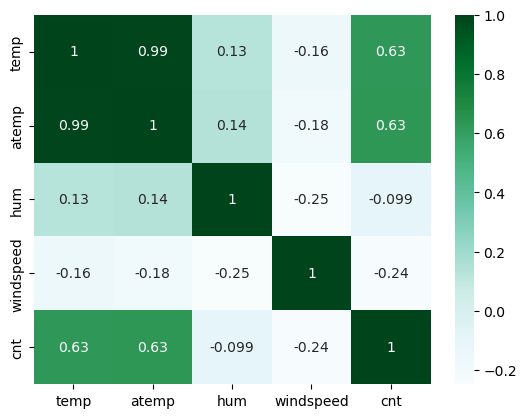

In [30]:
#plotting heatmap for continuous variable
sns.heatmap(bike_sharing_df[["temp","atemp","hum","windspeed","cnt"]].corr(),cmap="BuGn",annot=True);

**Insights**
- looking at the heat map, it is noticeable that temp and atemp is highly correlatetd with each other almost by 1
- seems like atemp is derived from temp
- Moreover, cnt showing some weak correlation with hum and windspeed as well.
- Since atemp and temp is highly correlated either one of them has to be dropper (multicollinearity)

Lets take a closer look at how cnt is related to windspeed, temp, hum, and windspeed with regression plot

#### CNT vs atemp

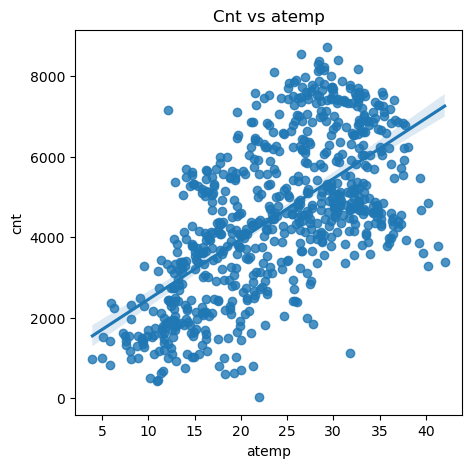

In [106]:
# pairplotting betweet cnt and atemp
plt.figure(figsize=(5,5))
plt.title("Cnt vs atemp")
sns.regplot(data=bike_sharing_df, x="atemp", y="cnt");

#### CNT vs Windspeed

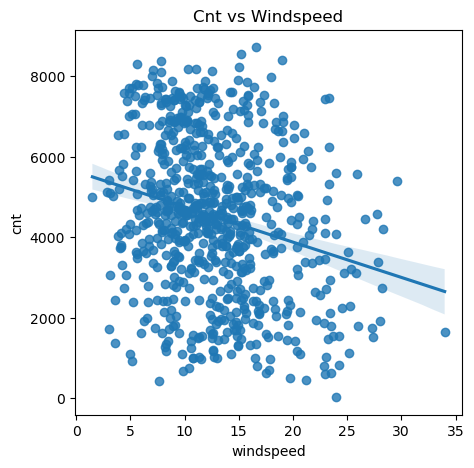

In [31]:
# pairplotting betweet cnt and windspeed
plt.figure(figsize=(5,5))
plt.title("Cnt vs Windspeed")
sns.regplot(data=bike_sharing_df, x="windspeed", y="cnt");

**Insights**
- seems like bike demands declines with windspeed
    - which seems quite obvious as during high windspeed, people would normally stay inside or prefer cars.

#### Cnt vs Humidity

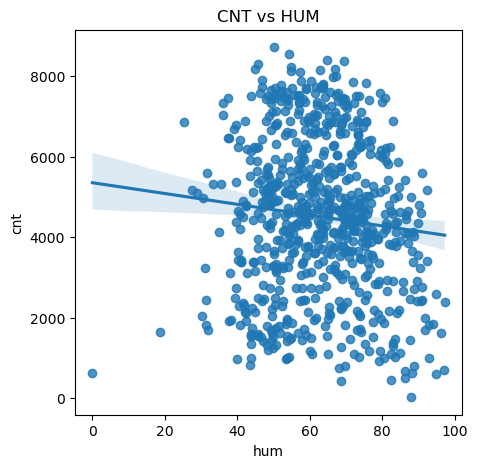

In [32]:
#regression plot between cnt and hum
plt.figure(figsize=(5,5))
plt.title("CNT vs HUM")
sns.regplot(data=bike_sharing_df,x="hum",y="cnt");

**Insights**
- although the relationship is quite weaker, but still bike demand lower with hum.

#### CNT vs Temp

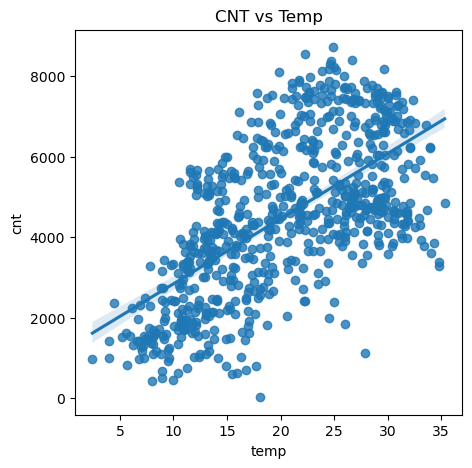

In [33]:
#regression plot between cnt and temp
plt.figure(figsize=(5,5))
plt.title("CNT vs Temp")
sns.regplot(data=bike_sharing_df, x="temp",y="cnt");

**Insights**
- There is a strong linear relationship between cnt and temp.
    - it seems the temp also predicts most of the variance in the demand.

### Analysing Categorical Variable

For analysing categorical variable we can use box plot

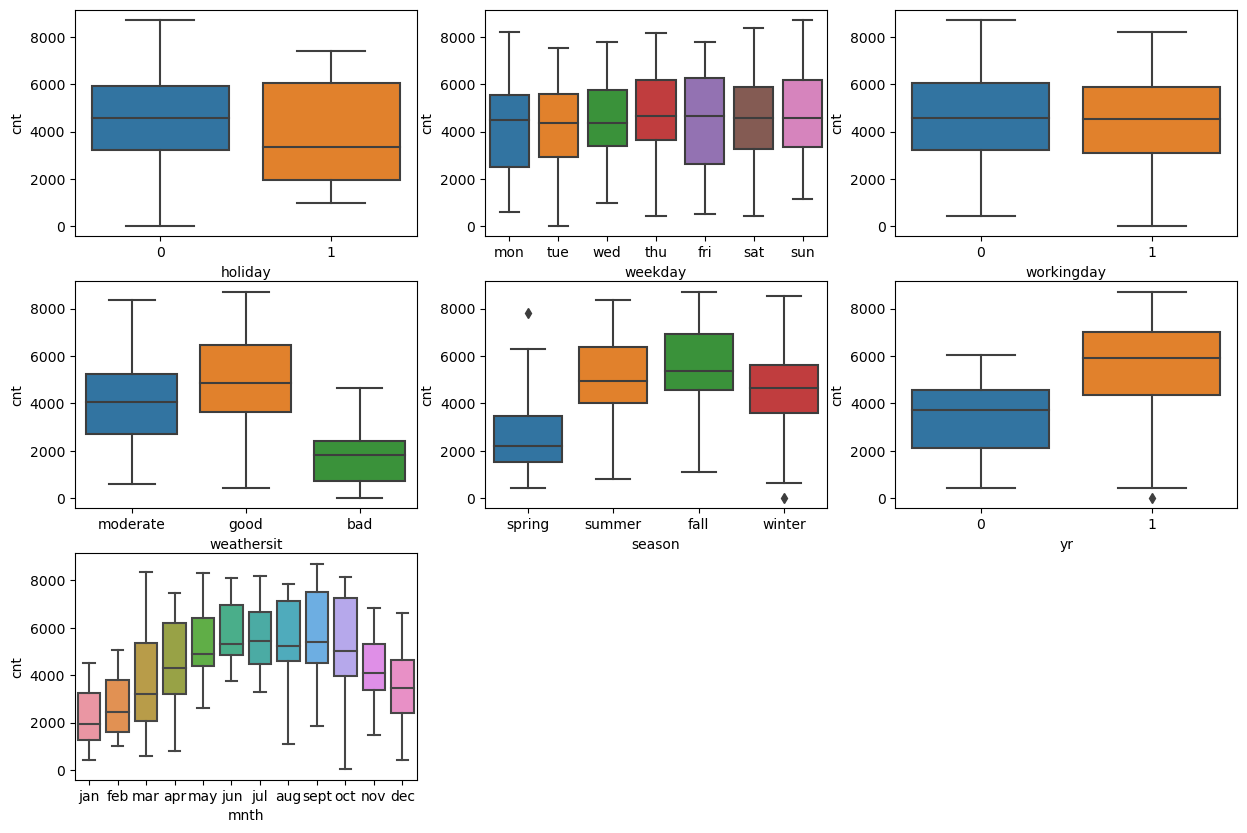

In [34]:
# plotting boxplot to see the demand in term of cnt variable
categorical_var = ['holiday','weekday','workingday','weathersit','season','yr','mnth']
plt.figure(figsize=(15,10))
for i,cat in enumerate(categorical_var):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=bike_sharing_df, x=cat, y='cnt')
plt.show()

**Insights**
- on holidays, bike demand is low
- bike demands is quite same over the weekdays, doesnt show any significant trend.
- whether its working day or not, it has no effect on bike demand
- seems like bike demand rises in good or moderate weather as compared to bad
- There is huge bike demand especially in the fall season followed by summer as compared to winter and spring
- Bike demand has shown a positive jump from last year.
- bike demand is high during the mid of the year from may to oct.

## Step 5: Data Preparation for Linear Regression Model

#### 5.1 Create dummy variable for all categorical variable

categorical variables:
    - season
    - mnth
    - weekday
    - weathersit

In [35]:
bike_sharing_df = pd.get_dummies(data=bike_sharing_df,columns=["season","mnth","weekday"],drop_first=True)
bike_sharing_df = pd.get_dummies(data=bike_sharing_df, columns=["weathersit"])

- Dropping first column for dummies (season, mnth, weekday) (p-1) dummies can explain p categories
- Not dropping first column for weathersit, so as to not lose the info about the sever weather condition

In [36]:
bike_sharing_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [37]:
bike_sharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0


#### 5.2 Splitting data into training and test

In [38]:
#Train Test split with 70:30 ratio
df_train, df_test = train_test_split(bike_sharing_df, train_size=0.7, random_state=100)

In [39]:
#Checking shape of train and test dataframe
print(df_train.shape)
print(df_test.shape)

(510, 31)
(220, 31)


#### 5.3 Scaling of continuous variable

Lets recale the continous variable: temp, hum, windspeed. Idea to rescale is that, it can be interpreted easily during model building

In [40]:
#before rescaling
df_train[["temp","hum","windspeed"]].head()

,temp,hum,windspeed
576,29.246653,70.4167,11.083475
426,16.980847,62.1250,10.792293
728,10.489153,48.3333,23.500518
482,15.443347,48.9583,8.708325
111,13.803347,72.9583,14.707907


In [41]:
# Create list of numeric variables
num_vars = ['temp','atemp','hum','windspeed']

#Create object for MinMaxScaler()
scaler = MinMaxScaler()

#fit and transform the training set
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [42]:
#After rescaling
df_train[["temp","hum","windspeed"]].head()

,temp,hum,windspeed
576,0.815169,0.725633,0.264686
426,0.442393,0.640189,0.255342
728,0.245101,0.498067,0.663106
482,0.395666,0.504508,0.188475
111,0.345824,0.751824,0.380981


## Step 6: Model Building

The approach we are going to use is hybrid
    - remove the columns with RFE automated approach
    - eleminate the feature one by one with manual elimination

In [43]:
# Get X_train by popping target value, y_train 
y_train = df_train.pop("cnt")
X_train = df_train

In [44]:
y_train.head()


576    7216
426    4066
728    1796
482    4220
111    1683
Name: cnt, dtype: int64

In [45]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,1,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,1,0,0,0,0,0,1


### 6.2 Select Feature using RFE Automated Approach

User RFE to eliminate some feature from training set

In [46]:
#Build Linear Regression Model with SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [47]:
#Cut down number of features to 15 using automated approach
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [48]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 11),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 3),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 13),
 ('mnth_mar', False, 16),
 ('mnth_may', False, 10),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 14),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', False, 6),
 ('weekday_sun', False, 7),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 12),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [49]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [50]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [51]:
# Taking 15 columns supported by RFE for regression
selected_columns = list(X_train.columns[rfe.support_])

In [52]:
X_train_rfe = X_train[selected_columns]
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [53]:
X_train_rfe.shape

(510, 15)

Create a list for features to remove from the X_train_rfe feature list

In [54]:
#create a list of feature to remove from RFE, we are starting with empty list
features_to_remove = []

### 6.2 Define common Functions

In [55]:
#function to create and print summary
def get_OLS_model(features_to_remove):
    X_train_sm = X_train_rfe.drop(features_to_remove,axis=1)
    X_train_sm = sm.add_constant(X_train_sm)
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())

In [56]:
#funtion to print VIF of the features
def get_VIF(features_to_remove):
    X_train_dropped_rfe = X_train_rfe.drop(features_to_remove,axis=1)
    vif = pd.DataFrame()
    vif["Features"] = X_train_dropped_rfe.columns
    vif["VIF"] =  [variance_inflation_factor(X_train_dropped_rfe.values, i) for i in range(X_train_dropped_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

Now we appropriate columns selected by RFE, we can build the model on top of those columns with Manual Elimination

### 6.3: Model 1

Start with all feature selected by RFE

In [57]:
#build the model and print summmary
get_OLS_model(features_to_remove)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Tue, 28 Mar 2023   Prob (F-statistic):          4.41e-189
Time:                        08:02:37   Log-Likelihood:                -4113.7
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     495   BIC:                             8321.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1356.2994    

In [58]:
#print the VIF of the columns
get_VIF(features_to_remove)

               Features    VIF
13      weathersit_good  49.00
14  weathersit_moderate  32.49
5         season_spring   5.20
12       weathersit_bad   4.16
2                  temp   3.97
7         season_winter   3.76
6         season_summer   2.68
3                   hum   1.90
8              mnth_jan   1.57
9              mnth_jul   1.49
10             mnth_nov   1.49
11            mnth_sept   1.31
4             windspeed   1.21
0                    yr   1.04
1               holiday   1.03


**Insights**
- mnth_nov has high p-value of 0.174

Since mnth_nov has high p-value, lets remove that feature and see how it affects the model and VIFs

### 6.4: Model 2

In [59]:
#Adding mnth_nov to drop list
features_to_remove = ["mnth_nov"]

In [60]:
#build the model and print summmary
get_OLS_model(features_to_remove)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Tue, 28 Mar 2023   Prob (F-statistic):          7.59e-190
Time:                        08:02:37   Log-Likelihood:                -4114.7
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     496   BIC:                             8317.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1314.6770    

In [61]:
#print the VIF of the columns
get_VIF(features_to_remove)

               Features    VIF
12      weathersit_good  48.01
13  weathersit_moderate  31.97
5         season_spring   5.08
11       weathersit_bad   4.13
2                  temp   3.89
7         season_winter   3.59
6         season_summer   2.65
3                   hum   1.90
8              mnth_jan   1.57
9              mnth_jul   1.49
10            mnth_sept   1.30
4             windspeed   1.21
0                    yr   1.04
1               holiday   1.02


**Insights**
- mnth_jan has high p-value of 0.059

Since mnth_jan has high p-value, lets remove that feature and see how it affects the model and VIFs

### 6.5: Model 3

In [62]:
#Adding mnth_jan to drop list
features_to_remove = ["mnth_nov","mnth_jan"]

In [63]:
#build the model and print summmary
get_OLS_model(features_to_remove)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Tue, 28 Mar 2023   Prob (F-statistic):          2.95e-190
Time:                        08:02:37   Log-Likelihood:                -4116.5
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     497   BIC:                             8314.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1243.5729    

In [64]:
#print the VIF of the columns
get_VIF(features_to_remove)

               Features    VIF
11      weathersit_good  46.52
12  weathersit_moderate  31.14
5         season_spring   5.02
10       weathersit_bad   4.08
2                  temp   3.61
7         season_winter   3.48
6         season_summer   2.62
3                   hum   1.89
8              mnth_jul   1.48
9             mnth_sept   1.30
4             windspeed   1.19
0                    yr   1.03
1               holiday   1.02


Now all the features/columns has low p value ( < 0.05 ). Lets start removing them according to high VIF

weathersit_good has very high VIF of 46.52. Lets remove that.

### 6.6: Model 4

In [65]:
#Adding weathersit_good to drop list
features_to_remove = ["mnth_nov","mnth_jan","weathersit_good"]

In [66]:
#build the model and print summmary
get_OLS_model(features_to_remove)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Tue, 28 Mar 2023   Prob (F-statistic):          2.95e-190
Time:                        08:02:37   Log-Likelihood:                -4116.5
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     497   BIC:                             8314.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2497.0845    

In [67]:
#print the VIF of the columns
get_VIF(features_to_remove)

               Features    VIF
3                   hum  28.03
2                  temp  16.03
4             windspeed   4.65
5         season_spring   4.01
7         season_winter   3.33
6         season_summer   2.79
11  weathersit_moderate   2.28
0                    yr   2.08
8              mnth_jul   1.58
9             mnth_sept   1.38
10       weathersit_bad   1.24
1               holiday   1.04


Now hum has a pretty noticeable VIF of 28, lets remove that.

### 6.6: Model 5

In [68]:
#Adding hum to drop list
features_to_remove = ["mnth_nov","mnth_jan","weathersit_good","hum"]

In [69]:
#build the model and print summmary
get_OLS_model(features_to_remove)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 28 Mar 2023   Prob (F-statistic):          5.06e-187
Time:                        08:02:37   Log-Likelihood:                -4127.0
No. Observations:                 510   AIC:                             8278.
Df Residuals:                     498   BIC:                             8329.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1755.4766    

In [70]:
#print the VIF of the columns
get_VIF(features_to_remove)

               Features   VIF
2                  temp  5.09
3             windspeed  4.60
5         season_summer  2.23
4         season_spring  2.08
0                    yr  2.07
6         season_winter  1.78
7              mnth_jul  1.58
10  weathersit_moderate  1.55
8             mnth_sept  1.34
9        weathersit_bad  1.08
1               holiday  1.04


temp has VIF of 5.09, lets remove that.

### 6.6: Model 6

In [71]:
#Adding temp to drop list
features_to_remove = ["mnth_nov","mnth_jan","weathersit_good","hum","temp"]

In [72]:
#build the model and print summmary
get_OLS_model(features_to_remove)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.8
Date:                Tue, 28 Mar 2023   Prob (F-statistic):          5.02e-149
Time:                        08:02:37   Log-Likelihood:                -4219.6
No. Observations:                 510   AIC:                             8461.
Df Residuals:                     499   BIC:                             8508.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5095.6126    

In [73]:
#print the VIF of the columns
get_VIF(features_to_remove)

              Features   VIF
2            windspeed  3.81
3        season_spring  2.07
4        season_summer  2.01
0                   yr  1.83
5        season_winter  1.73
9  weathersit_moderate  1.52
6             mnth_jul  1.19
7            mnth_sept  1.16
8       weathersit_bad  1.08
1              holiday  1.04


**Insights**
- although the VIF for all the columns is lower than 5 after dropping temp, but seems like it has drastically affected our R-squared. It has dropped from 83% to 76%. Which is unacceptable.
- and it also made the p-value changed

Lets restore temp, and try to remove the feature with highest p-values among the remaining features.

### 6.6: Model 7

In [74]:
#remove temp and add mnth_july to drop list
features_to_remove = ["mnth_nov","mnth_jan","weathersit_good","hum","mnth_jul"]

In [75]:
#build the model and print summmary
get_OLS_model(features_to_remove)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 28 Mar 2023   Prob (F-statistic):          1.47e-186
Time:                        08:02:38   Log-Likelihood:                -4130.9
No. Observations:                 510   AIC:                             8284.
Df Residuals:                     499   BIC:                             8330.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1680.9085    

In [76]:
#print the VIF of the columns
get_VIF(features_to_remove)

              Features   VIF
3            windspeed  4.60
2                 temp  3.84
0                   yr  2.07
4        season_spring  1.99
5        season_summer  1.90
6        season_winter  1.63
9  weathersit_moderate  1.55
7            mnth_sept  1.23
8       weathersit_bad  1.08
1              holiday  1.04


**Insights**
- although the VIF for all the columns is lower than 5 after dropping mnth_jul and restoring temp.
- VIF of all the features are lower than 5
- P values of the variable also lower than 0.05 

The R-squared for this model is 0.833 is very clost R-squared of original model with all feature which is 0.844. Since this model is so far the better candidate among other models, we are going the take this model further for analysis and predication. Moreover, the difference between the R-squared and ajdusted R-squared is less.

### 6.7: Finalizing the Model

Lets finalized the model 7, and create the final model with sklearn

In [77]:
#build the final model using sklearn
features_to_remove = ["mnth_nov","mnth_jan","weathersit_good","hum","mnth_jul"]
X_train_final = X_train_rfe.drop(features_to_remove,axis=1)
y = y_train
lr = LinearRegression()
lr.fit(X_train_final,y)
print(lr.intercept_,lr.coef_)

1680.9085201193252 [ 2035.07380264  -837.1793967   4152.48616651 -1287.26787409
  -481.59003194   539.56547565   821.18894256   790.95125669
 -2477.4932855   -684.41415243]


## Step 7. Model Evaluation 
### 7.1 Residual Analysis

In [78]:
#selected column of finalized model
selected_columns = list(X_train_final.columns)

In [79]:
#predicting the values based on training set with selected columns
y_train_pred = lr.predict(X_train[selected_columns])

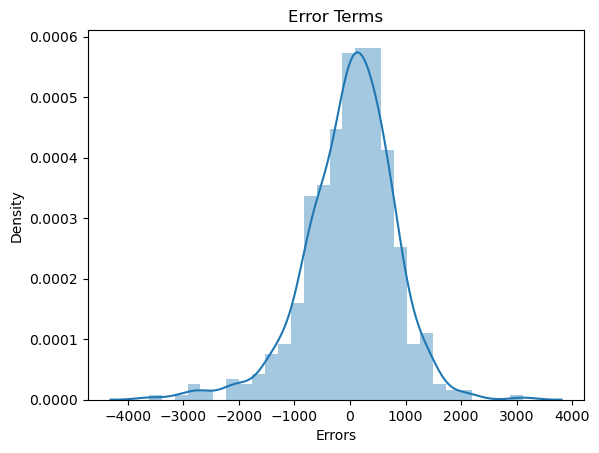

In [80]:
res = y_train - y_train_pred
sns.distplot(res)
plt.title('Error Terms')
plt.xlabel('Errors');

Since error terms seems to be normally distributed around mean of 0, we are confident with our model so far.

Lets check how predicted and actual related to each other 

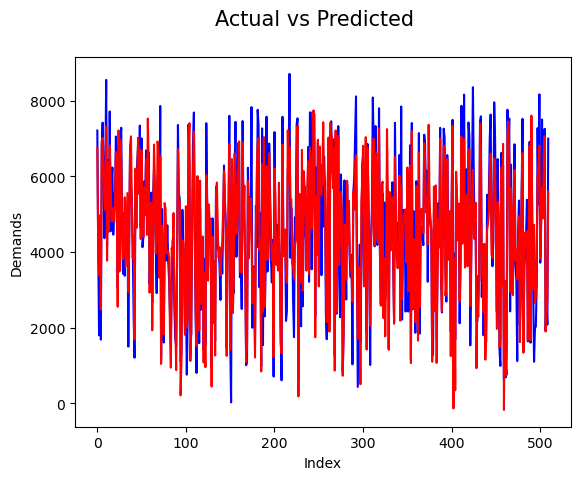

In [81]:
idx = [i for i in range(0,len(X_train[selected_columns]),1)]
plt.plot(idx,y_train, color="blue")
plt.plot(idx,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Almost the same pattern is there for actual and predicted Y

Lets check the patterns for error terms

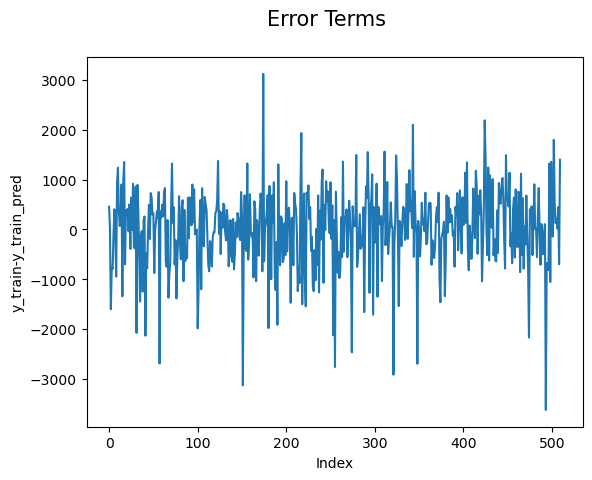

In [82]:
# Error Terms
idx = [i for i in range(0,len(X_train),1)]
plt.plot(idx,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

Seems like error terms are independant of each other, as they do not show any pattern or noticeable trends among themselves

Lets check the R score for the model

In [83]:
#Get R score
r2_score(y_train_pred,y_train)

0.7990978647659006

The R-score for our model is 0.79 which is close to our finalised model (0.833)

### 7.2 Linearity Check

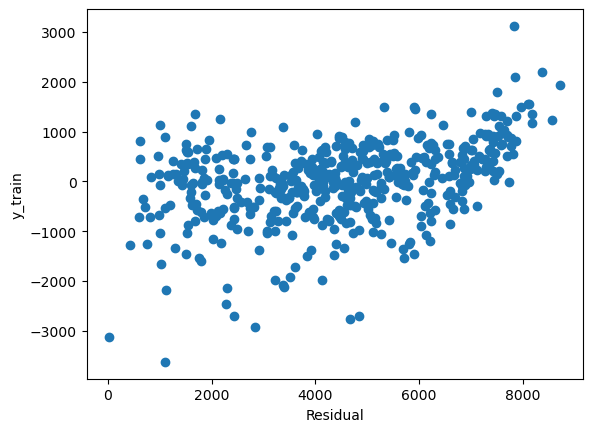

In [85]:
# creating scatter plot for checking the linearity
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### 7.3 Predict values for test data set

Since test dataset is not scaled therefore, we need to scale that first based upon train set.

In [87]:
#before rescaling
df_test[["temp","hum","windspeed"]].head()

,temp,hum,windspeed
184,29.793347,63.7917,5.459106
535,32.082500,59.2083,7.625404
299,19.270000,81.2917,13.250121
221,31.433347,42.4167,13.417286
152,29.315000,30.5000,19.583229


In [88]:
# Create list of numeric variables
num_vars = ['temp','atemp','hum','windspeed']

#transform the training set
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [90]:
#After rescaling
df_test[["temp","hum","windspeed"]].head()

,temp,hum,windspeed
184,0.831783,0.657364,0.084219
535,0.901354,0.610133,0.153728
299,0.511964,0.837699,0.334206
221,0.881625,0.437098,0.339570
152,0.817246,0.314298,0.537414


In [93]:
#checking the selected column of our final model
selected_columns

['yr',
 'holiday',
 'temp',
 'windspeed',
 'season_spring',
 'season_summer',
 'season_winter',
 'mnth_sept',
 'weathersit_bad',
 'weathersit_moderate']

In [94]:
# Get X_train by popping target value, y_train 
y_test = df_test.pop("cnt")
X_test = df_test

In [95]:
#Predict the values for test data
y_test_pred = lr.predict(X_test[selected_columns])

### 7.4 Checking R-Squared value for test dataset

In [97]:
#Get R squared value between test and predicted test dataset.  
r2_score(y_test,y_test_pred)

0.803819599072884

**Insights**
- R2 score for predictions on test data (0.803) is close or similar to R2 score of train dataset (0.79). Which is good R score values, hence we can say our model is performing good on test data.

### 7.5 Residual Analysis for Test Dataset

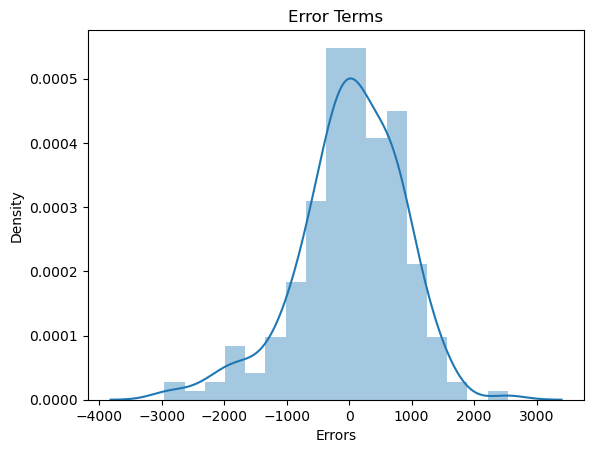

In [99]:
#Distribution plot for residual
res = y_test - y_test_pred
sns.distplot(res)
plt.title('Error Terms')
plt.xlabel('Errors');

**Insights**
- The distribution is normal or its a normal distribution with a mean of 0.
- error terms are randomly distributed and there is no pattern which means the output is explained well by the model

### 7.6 Predicate vs Actual value overlap

Lets check how predicted and actual value is overlapping for test dataset

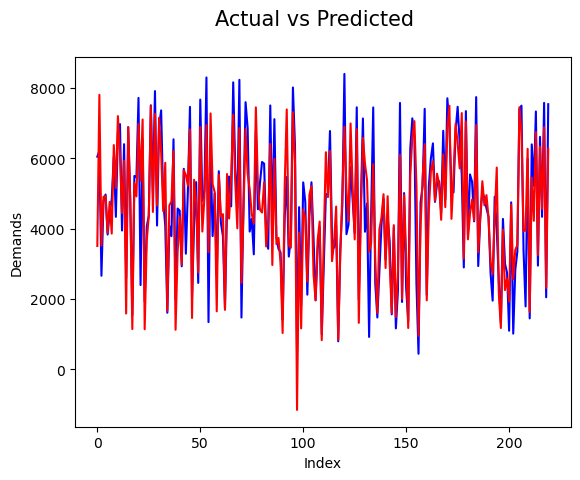

In [102]:
idx = [i for i in range(0,len(X_test[selected_columns]),1)]
plt.plot(idx,y_test, color="blue")
plt.plot(idx,y_test_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

**Insights**
- Almost the same pattern is there for actual and predicted Y for test dataset.

### 7.7 Homoscedacity  check

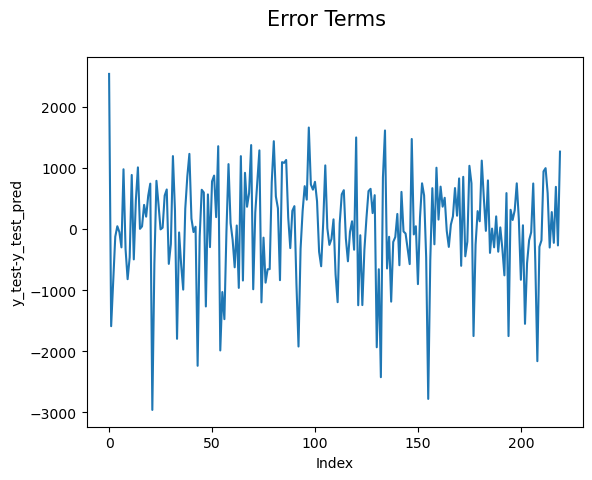

In [109]:
# Error Terms
idx = [i for i in range(0,len(X_test),1)]
plt.plot(idx,y_test-y_test_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_test-y_test_pred')
plt.show()

**Insights**
- We can observe that variance of the residuals (error terms) is constant across predictions. i.e., error term does not vary much as the value of the predictor variable changes.

## 8. Making Predictions

### 8.1 Intrepretting the Model

Lets interpret our final model and make conclusions.

In [103]:
print(lr.intercept_,lr.coef_)

1680.9085201193252 [ 2035.07380264  -837.1793967   4152.48616651 -1287.26787409
  -481.59003194   539.56547565   821.18894256   790.95125669
 -2477.4932855   -684.41415243]


In [105]:
features_to_remove = ["mnth_nov","mnth_jan","weathersit_good","hum","mnth_jul"]
get_OLS_model(features_to_remove)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 28 Mar 2023   Prob (F-statistic):          1.47e-186
Time:                        08:38:41   Log-Likelihood:                -4130.9
No. Observations:                 510   AIC:                             8284.
Df Residuals:                     499   BIC:                             8330.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1680.9085    

### 8.2: Interepretating results based on Final model

#### After Analysing the above model thoroughly, the comapany should focus on following points:
- In Spring the demand is down hence Company should focus on expanding business during Spring through marketing. The same is true for september.
- Company can utilize the time when there is Light Snow or Rain, for servicing the bikes and improving the apps based upon feedbacks. And enhance the user experience.
- Based on previous data it is expected to have increment in demand of bikes once situation comes back to normal, compared to 2019.
- During high windy days, people tend to stay home. So company obviously can expect less demand and should keep an eye on weather situation, and take step accordingly.

### 8.3: Conclusion

Significant variables to predict the demand for shared bikes
- yr
- holiday
- temp
- windspeed
- season
- month: september,
- weathersit( Light Snow, Mist + Cloudy)